In [21]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn import cluster

In [22]:
a = np.array(['a', 'b', 'b', 'c', 'a'])
count = np.unique(a, return_counts=True)
print(count[0][1])
count[1][1]

b


2

In [24]:
def compute_labels(X, centroids):
    """Compute labels.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.

    Returns
    -------
    labels : array, shape (n_samples,)
        The labels of each sample
    """
    # Q1: Implement K-means
    # Compute distances  to each point to each centroid -> assign the minimum index
    # to centroids labels

    dist = distance.cdist(X, centroids, metric='euclidean')
    return np.argmin(dist, axis=1)


def compute_inertia_centroids(X, labels):
    """Compute inertia and centroids.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    labels : array-like, shape (n_samples,)
        The labels of each sample.

    Returns
    -------
    inertia: float
        The inertia.

    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.
    """
    # Q1: Implement K-means
    # Compute centroids
    labels_unique = np.unique(labels)
    centroids = np.empty((len(labels_unique), X.shape[1]), dtype=X.dtype)
    inertia = 0
    for k, l in enumerate(labels_unique):
        X_l = X[labels == l]
        centroids[k] = np.mean(X_l, axis=0)
        dist = distance.cdist(X_l, [centroids[k]], metric='euclidean')
        inertia += np.sum(dist * 2)
    return inertia, centroids


def Kmeans(X, n_clusters, max_iter=100, tol=1e-7, random_state=42):
    """Estimate position of centroids and labels.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_clusters: int
        The desired number of clusters.

    max_iter: int, defaults 100.
        Max number of update.

    tol: float, defaults 1e-7.
        The tolerance to check convergence.

    random_state: int, defaults to 42.
        A random number generator instance.

    Returns
    -------
    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.

    labels: array-like, shape (n_samples,)
        The estimated labels.

    inertia: float
        The inertia.
    """
    # Q1: Implement K-means
    listinertia=[]
    rng = np.random.RandomState(random_state)
    centroids = X[rng.permutation(len(X))[:n_clusters]]
    labels = compute_labels(X, centroids)
    old_inertia = np.inf
    i=0
    for i in range(max_iter):
        inertia, centroids = compute_inertia_centroids(X, labels)
        listinertia.append(inertia)
        if abs(inertia - old_inertia) < tol:
            break
        old_inertia = inertia
        
        labels = compute_labels(X, centroids)
    return labels, centroids, inertia, listinertia
if __name__ == '__main__':
    from sklearn.datasets import make_blobs

    # Parameters
    random_state = 0
    n_samples = 1000
    color = 'rgbcmyk'

    # Generate data
    X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                      centers=3)

    # Q1-Q4 Apply K-means to X

In [25]:
labels, centroids, inertia, listinertia= Kmeans(X,10)

In [26]:
listinertia

[1835.8628695134792,
 1624.6113278515154,
 1555.8901006910748,
 1518.9216088340841,
 1494.3957810086883,
 1479.006635866238,
 1468.6842508840796,
 1460.5959022875113,
 1454.5038667667004,
 1449.7027183765688,
 1445.3422662148005,
 1439.5004591480292,
 1437.2973919900489,
 1435.9344755870663,
 1435.0641952839571,
 1433.9793521580291,
 1433.7412247878829,
 1433.7048800344126,
 1433.7048800344126]

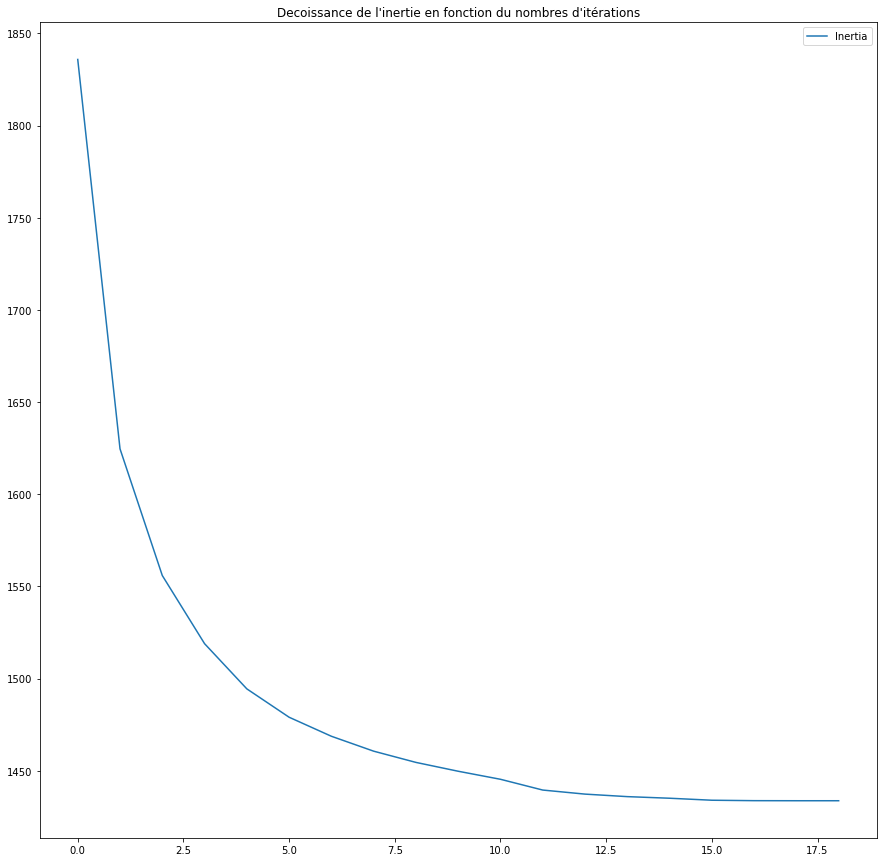

In [27]:
plt.figure(figsize=(15,15))
plt.plot(range(len(listinertia)), listinertia, label='Inertia')
plt.title("Decoissance de l'inertie en fonction du nombres d'itérations")
plt.legend()
plt.show()

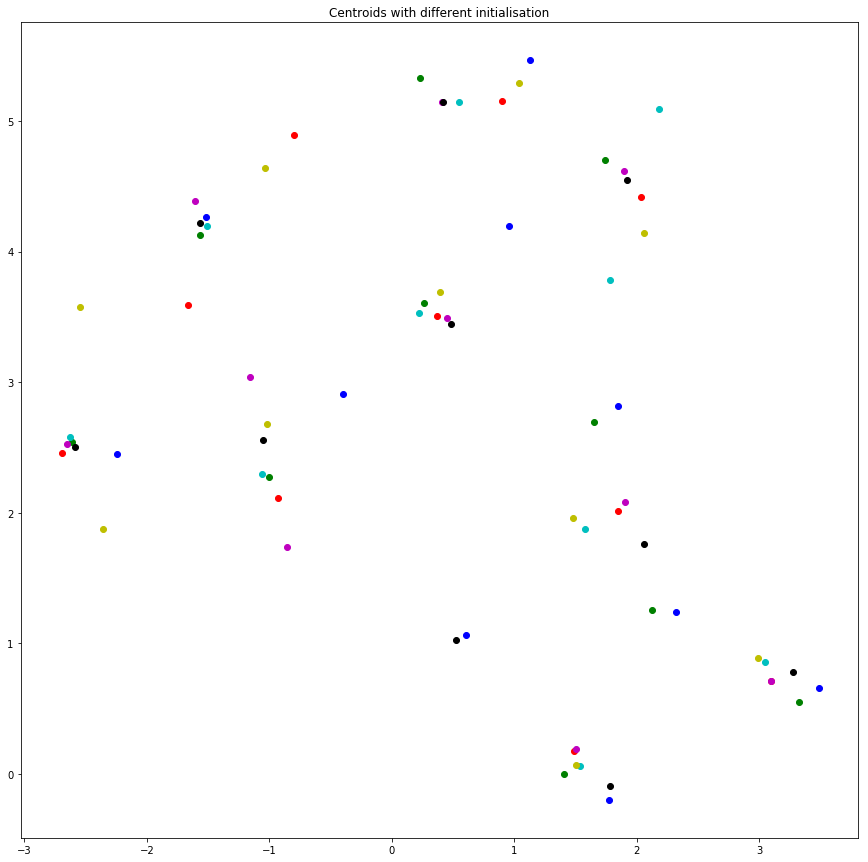

In [28]:
plt.figure(figsize=(15,15))
colortab = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i in range(7):
    labels, centroids, inertia, listinertia = Kmeans(X,10, random_state=i)
    plt.scatter(centroids[:,0],centroids[:,1], color=colortab[i])
plt.title('Centroids with different initialisation')
plt.show()

In [29]:


kmeans = cluster.KMeans(n_clusters=3, n_init=10)
%timeit kmeans.fit(X)
labels = kmeans.labels_




23.3 ms ± 650 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
%timeit Kmeans(X,3)

2.22 ms ± 58.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
rng = np.random.RandomState(26)

In [32]:
amin = [0, 1 , 2 ]
amax = [1, 2, 3]
print(rng.uniform(low=amin, high=amax, size=(3,3)))
print(rng.uniform(size=len(amax)))

[[ 0.30793495  1.51939148  2.76829766]
 [ 0.78922074  1.87056206  2.18792139]
 [ 0.26950525  1.49619214  2.73912175]]
[ 0.19495199  0.17974525  0.53882626]


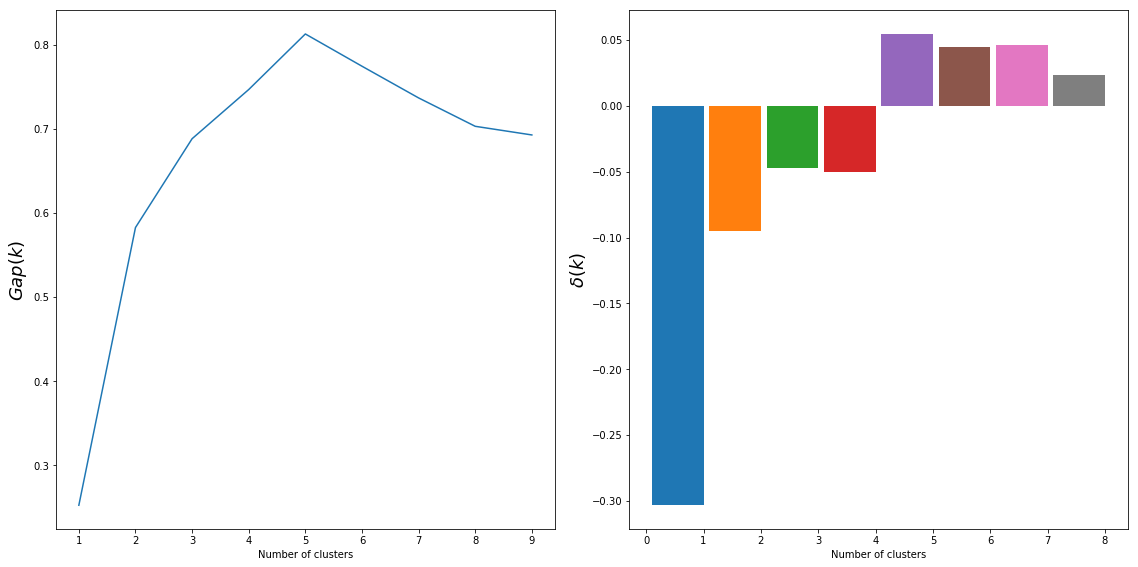

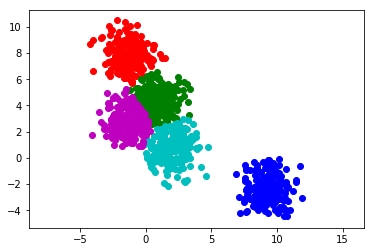

In [85]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


def compute_log_inertia(X, n_clusters, T, bb_min, bb_max,
                        random_state=0):
    """Compute the log inertia of X and X_t.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_clusters: int
        The desired number of clusters.

    T: int
        Number of draws of X_t.

    bb_min: array, shape (n_features,)
        Inferior corner of the bounding box of X.

    bb_max: array, shape (n_features,)
        Superior corner of the bounding box of X.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    log_inertia: float
        Log of the inertia of the K-means applied to X.

    mean_log_inertia_rand: float
        Mean of the log of the inertia of the K-means applied to the different
        X_t.

    std_log_inertia_rand: float
        Standard deviation of the log of the inertia of the K-means applied to
        the different X_t.
    """
    rand_inertia = np.zeros(T)
    _, _, inertia, _ = Kmeans(
        X, n_clusters)
    log_inertia = np.log(inertia)
    for i in range(T):
        X_t = rng.uniform(low=bb_min, high=bb_max, size=X.shape)
        _, _, rand_inertia[i], _ = Kmeans(
            X_t, n_clusters)
    rand_inertia=np.log(rand_inertia)

    return np.log(inertia), np.mean(rand_inertia), np.std(rand_inertia)
    

def compute_gap(X, n_clusters_max, T=10, random_state=0):
    """Compute values of Gap and delta.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster_max: int
        Maximum number of cluster to test.

    T: int, defaults 10.
        Number of draws of X_t.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    n_clusters_range: array-like, shape (n_clusters_max-1,)
        Array of number of clusters tested.

    gap: array-like, shape (n_clusters_max-1,)
        Return the gap values.

    delta: array-like, shape (n_clusters_max-1,)
        Return the delta values.

    """
    n_clusters_range = np.arange(1, n_clusters_max)
    bb_min, bb_max = np.min(X, 0), np.max(X, 0)
    log_inertia = np.empty(len(n_clusters_range))
    log_inertia_rand = np.empty(len(n_clusters_range))
    safety = np.empty(len(n_clusters_range))
    for k, n_clusters in enumerate(n_clusters_range):
        log_inertia[k], log_inertia_rand[k], safety[k] = compute_log_inertia(
            X, n_clusters, T, bb_min, bb_max)

    gap = log_inertia_rand - log_inertia
    delta = gap[:-1] - (gap[1:] - np.sqrt(1. + 1. / T) * safety[1:])

    return n_clusters_range, gap, delta


def plot_result(n_clusters_range, gap, delta):
    """Plot the values of Gap and delta.

    Parameters
    ----------
    n_clusters_range: array-like, shape (n_clusters_max-1,)
        Array of number of clusters tested.

    gap: array-like, shape (n_clusters_max-1,)
        Return the gap values.

    delta: array-like, shape (n_clusters_max-1,)
        Return the delta values.
    """
    plt.figure(figsize=(16, 8))
    plt.subplots_adjust(left=.05, right=.98, bottom=.08, top=.98, wspace=.15,
                        hspace=.03)

    plt.subplot(121)
    plt.plot(n_clusters_range, gap)
    plt.ylabel(r'$Gap(k)$', fontsize=18)
    plt.xlabel("Number of clusters")

    plt.subplot(122)
    for x, y in zip(n_clusters_range, delta):
        plt.bar(x - .45, y, width=0.9)
    plt.ylabel(r'$\delta(k)$', fontsize=18)
    plt.xlabel("Number of clusters")

    plt.draw()


def optimal_n_clusters_search(X, n_clusters_max, T=10, random_state=0):
    """Compute the optimal number of clusters.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster_max: int
        Maximum number of cluster to test.

    T: int, defaults 10.
        Number of draws of X_t.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    n_clusters_optimal: int
        Optimal number of clusters.
    """
    clusters_range, _, delta = compute_gap(X, n_clusters_max, T,
                                           random_state=0)
    for k, value in enumerate(delta):
        if value > 0:
            break

    return clusters_range[k]


if __name__ == '__main__':
    # Parameters
    random_state = 0
    n_samples, n_clusters_max = 1000, 10
    color = 'rgbcmyk'

    n_clusters = 5
    X, labels = make_blobs(n_samples=n_samples, random_state=random_state,
                           centers=n_clusters)

    plot_result(*compute_gap(X, n_clusters_max))

    plt.figure()
    n_clusters_opt = optimal_n_clusters_search(X, n_clusters_max)
    labels, _, _ ,_= Kmeans(X, n_clusters_opt)
    for k in range(n_clusters):
        plt.scatter(X[labels == k, 0], X[labels == k, 1], color=color[k])
        plt.axis("equal")
    plt.show()

In [79]:
X_1, y_1 = make_blobs(n_samples=n_samples, random_state=random_state+1,
                      centers=3)
X_2, y_2 = make_blobs(n_samples=n_samples, random_state=random_state+2,
                      centers=5)
X_3, y_3 = make_blobs(n_samples=n_samples, random_state=random_state+3,
                      centers=8)
X_4, y_4 = make_blobs(n_samples=n_samples, random_state=random_state+4,
                      centers=10)

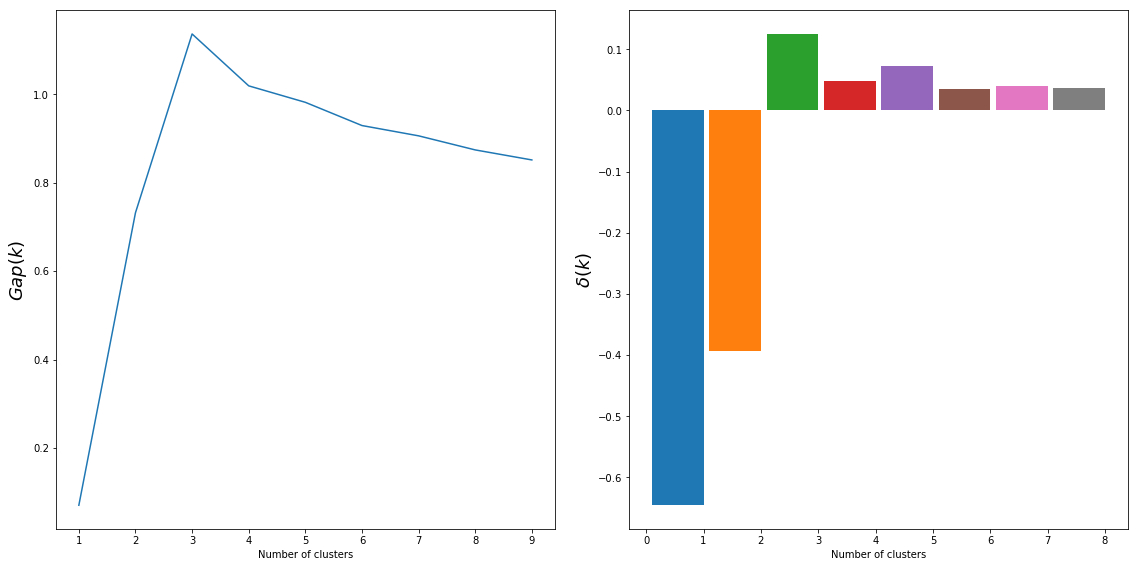

In [80]:
n_clusters_range, gap, delta=compute_gap(X_1,10)
plot_result(n_clusters_range, gap, delta)


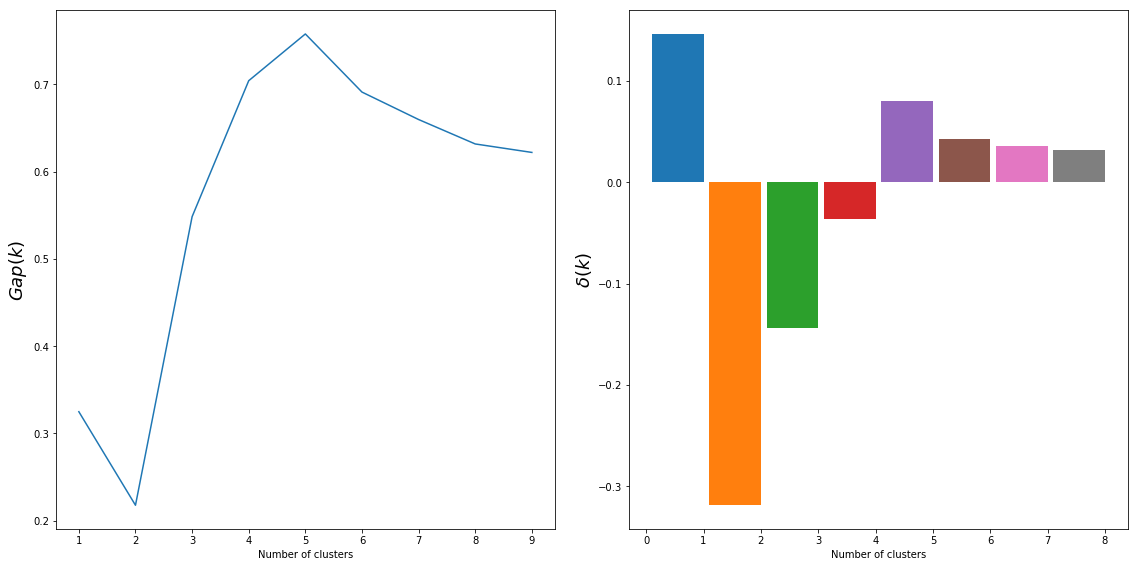

In [81]:
n_clusters_range, gap, delta=compute_gap(X_2,10)
plot_result(n_clusters_range, gap, delta)


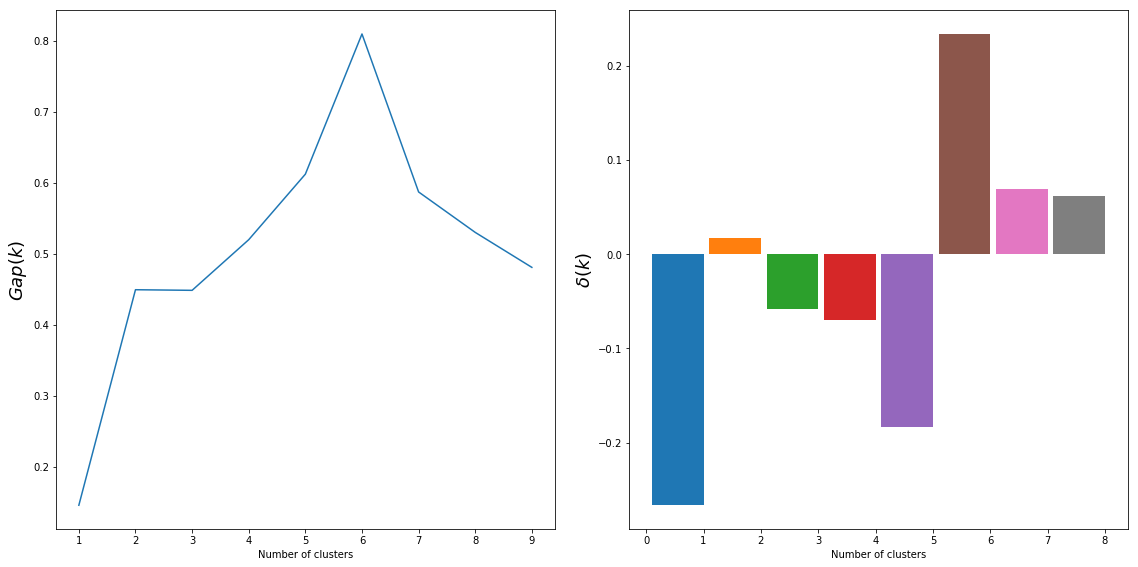

In [82]:
n_clusters_range, gap, delta=compute_gap(X_3,10)
plot_result(n_clusters_range, gap, delta)


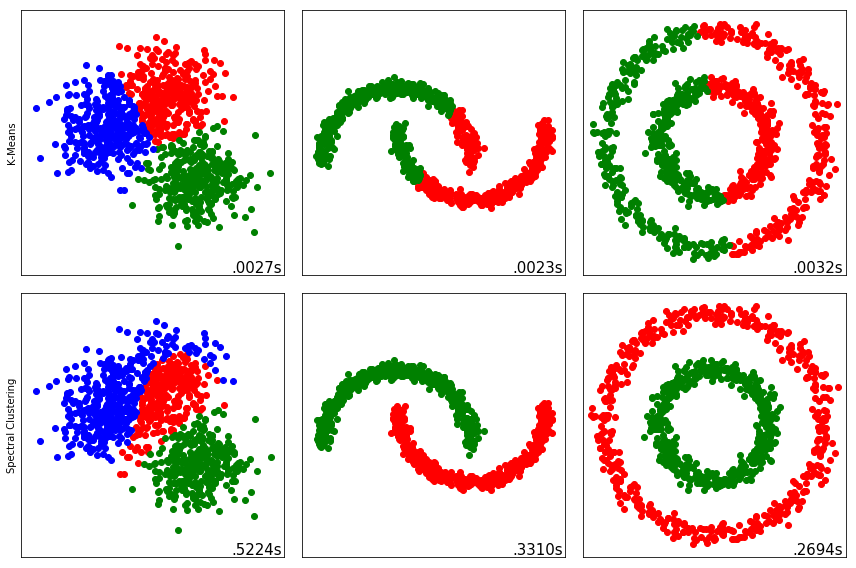

In [93]:
"""Spectral clustering analysis."""
import time
import scipy
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.neighbors import BallTree
from scipy.sparse import coo_matrix


def compute_affinity_matrix(X, epsilon=None):
    """Compute the affinity matrix from the number of neighbors.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    epsilon: float | None.
        epsilon parameter to define the neighborhood of each sample.
        If None, it is inferred from the data.

    Returns
    -------
    affinity_matrix: array-like, shape (n_samples, n_samples)
        Affinity matrix.
    """
    n_samples, _ = X.shape

    if epsilon is None:
        epsilon = 3. * np.mean(BallTree(X).query(X, 10)[0][:, -1])

    ind, d = BallTree(X).query_radius(X, r=epsilon, return_distance=True)
    data_pos = np.array([[value, r, c]
                        for r, (ind_r, data_r) in enumerate(zip(ind, d))
                        for c, value in zip(ind_r, data_r)])
    data_pos[:, 0] = np.exp(-.5 * (data_pos[:, 0] / epsilon) ** 2)

    W = coo_matrix((data_pos[:, 0], (data_pos[:, 1], data_pos[:, 2])),
                   shape=(n_samples, n_samples), dtype=np.float)
    W = W.toarray()

    return W


def spectral_clustering(X, n_clusters=2, n_neighbors=10):
    """Compute the affinity matrix from the number of neighbors.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster: int, defaults to 2
        The number of clusters to form.

    n_neighbors: int, defaults to 10
        Number of neighbors considered to compute the affinity matrix.

    Returns
    -------
    labels: array-like, shape (n_samples,)
        The estimated labels
    """
    # Q10: Complete the spectral clustering here.
    W = compute_affinity_matrix(X)
    L = np.diag(W.sum(1)) - W
    U = scipy.linalg.eigh(L)[1][:, :n_clusters]
    labels, _, _,_ = Kmeans(U, n_clusters=n_clusters)
    return labels


if __name__ == '__main__':
    # Parameters
    random_state = 0
    n_samples, n_clusters, n_neighbors = 1000, 3, 10
    color = 'rgbcmyk'

    # Data to analyse
    datasets = {
        'blobs': make_blobs(n_samples=n_samples, random_state=random_state,
                            centers=3),
        'moons': make_moons(n_samples=n_samples, noise=.05, shuffle=True,
                            random_state=random_state),
        'circles': make_circles(n_samples=n_samples, factor=.5, noise=.05,
                                shuffle=True, random_state=random_state)
    }

    # Q9 - Q11 : Analysis of datasets
    plt.figure(figsize=(12, 8))

    for i, (_, data) in enumerate(datasets.items()):
        X, y = data
        n_clusters = np.max(y) + 1

        # K-Means
        t0 = time.time()
        labels_kmeans, _, _, _ = Kmeans(X, n_clusters=n_clusters)
        time_kmeans = time.time() - t0

        # Spectral
        t0 = time.time()
        labels_spectral = spectral_clustering(X, n_clusters=n_clusters)
        time_spectral = time.time() - t0

        for j, (labels, t) in enumerate(zip((labels_kmeans, labels_spectral),
                                            (time_kmeans, time_spectral))):
            ax = plt.subplot(2, 3, 3 * j + i + 1)
            for k in range(n_clusters):
                ax.scatter(X[labels == k, 0], X[labels == k, 1],
                           color=color[k])

            ax.axis('equal')
            ax.set_xticks(())
            ax.set_yticks(())
            ax.text(.99, .01, ('%.4fs' % t).lstrip('0'),
                    transform=plt.gca().transAxes, size=15,
                    horizontalalignment='right')
            if not i:
                ax.set_ylabel(['K-Means', 'Spectral Clustering'][j])

    plt.tight_layout()
    plt.show()




In [98]:
import imageio
im = imageio.imread('china.jpg')

In [99]:
im.shape

(427, 640, 3)

In [132]:
ImageArray = im.reshape(427, 640 * 3)
print(ImageArray.shape)

(427, 1920)


<bound method FormatManager.show of <imageio.FormatManager with 90 registered formats>>

In [143]:
rows = im.shape[0]
cols = im.shape[1]

In [144]:
image = im.reshape(im.shape[0]*im.shape[1],3)

In [169]:
labels, centroids, inertia, listinertia = Kmeans(image, 256)

In [171]:
# resize to original shape
l=labels.reshape(rows, cols)

In [172]:
#apply clustering
l = centroids[l]

In [173]:
#control shape
l.shape

(427, 640, 3)

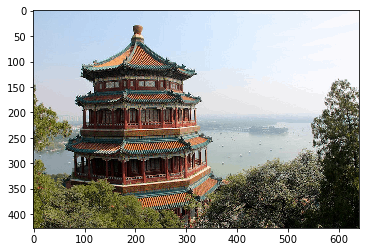

In [174]:
from matplotlib.pyplot import imshow
imshow(l)

In [189]:
## appliquoonsle Spectral clustering avec les matrices sparse

from sklearn import cluster as cl
X= im.reshape(im.shape[0]*im.shape[1],3)
X = np.asarray(X)

In [190]:
clf= cl.spectral_clustering(n_clusters=['8'],affinity='rbf',eigen_solver='amg')

AttributeError: 'str' object has no attribute 'ndim'